<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/NLP_Encoder_Decoder_%EA%B5%AC%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

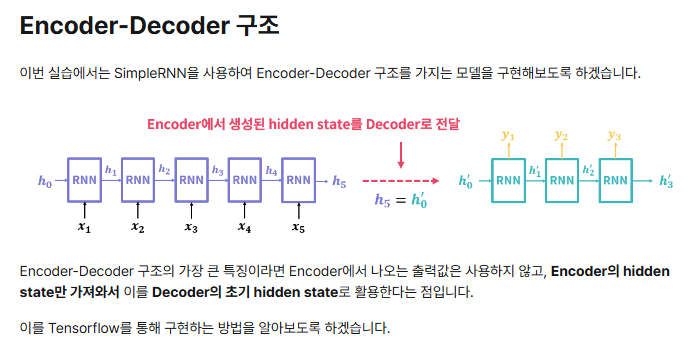

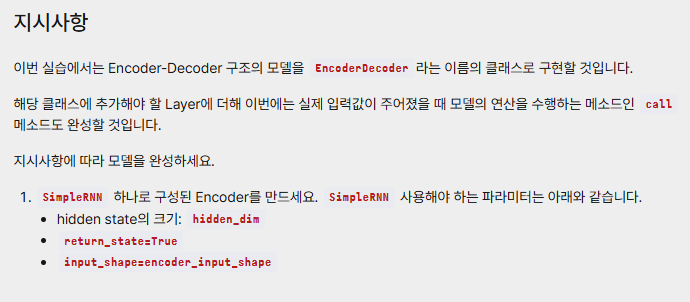

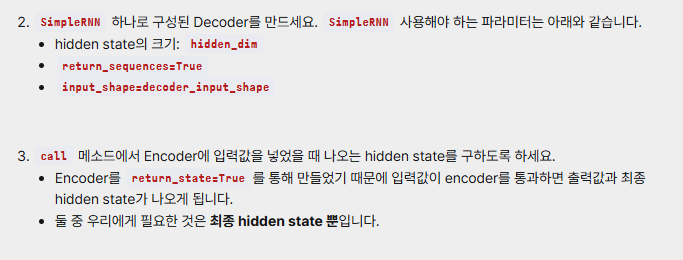

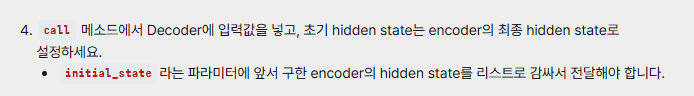

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Sequential, Input

class EncoderDecoder(Model):
    def __init__(self, hidden_dim, encoder_input_shape, decoder_input_shape, num_classes):
        super(EncoderDecoder, self).__init__()

        # TODO: [지시사항 1번] SimpleRNN으로 이루어진 Encoder를 정의하세요.
        self.encoder = layers.SimpleRNN(hidden_dim, return_state=True, input_shape=encoder_input_shape)

        # TODO: [지시사항 2번] SimpleRNN으로 이루어진 Decoder를 정의하세요.
        self.decoder = layers.SimpleRNN(hidden_dim, return_sequences=True, input_shape=decoder_input_shape)
        # 여기서는 디코더의 input은 인코더의 input과 달라야함
        self.dense = layers.Dense(num_classes, activation="softmax")

        # return_sequences 가 False라면 마지막 출력값만 True 면 시점별 모든 출력값 사용
        # return_state 는 hidden state를 사용하기 위한 파라미터 이다 True로 설정하면 출력값과 최종 hidden state가 나온다.

    def call(self, encoder_inputs, decoder_inputs):
        # TODO: [지시사항 3번] Encoder에 입력값을 넣어 Decoder의 초기 state로 사용할 state를 얻어내세요.
        # 출력값이 encoder_outputs 과 encoder_state 두개가 나온다.
        # encoder_outputs, encoder_state = self.encoder(encoder_inputs)
        _, encoder_state = self.encoder(encoder_inputs) # 위와 동일한데 _ 쓰면 이 값을 사용하지 않는다는 것을 명시적으로 알려줌.

        # TODO: [지시사항 4번] Decoder에 입력값을 넣고, 초기 state는 Encoder에서 얻어낸 state로 설정하세요.
        decoder_outputs = self.decoder(decoder_inputs, initial_state=[encoder_state])
        # initial_state 는 추가적인 state를 받는 경우도 있어서 리스트 형태로 받는다

        outputs = self.dense(decoder_outputs)

        return outputs


def main():
    # hidden state의 크기
    hidden_dim = 20

    # Encoder에 들어갈 각 시점의 데이터의 모양
    encoder_input_shape = (10, 1) # (시쿼스의 길이 10, 각 시점의 데이터는 1개의 feature)

    # Decoder에 들어갈 각 시점의 데이터의 모양
    decoder_input_shape = (30, 1)

    # 분류한 클래스 개수
    num_classes = 5

    # Encoder-Decoder 모델을 만듭니다.
    model = EncoderDecoder(hidden_dim, encoder_input_shape, decoder_input_shape, num_classes)

    # 모델에 넣어줄 가상의 데이터를 생성합니다.
    encoder_x, decoder_x = tf.random.uniform(shape=encoder_input_shape), tf.random.uniform(shape=decoder_input_shape)
    encoder_x, decoder_x = tf.expand_dims(encoder_x, axis=0), tf.expand_dims(decoder_x, axis=0)
    y = model(encoder_x, decoder_x)

    # 모델의 정보를 출력합니다.
    model.summary()

if __name__ == "__main__":
    main()

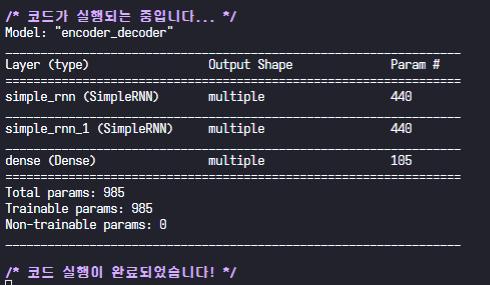